In this notebook, we clusterize our 200k entries so that each future customer could compare with persons owning his group.

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
X = pd.read_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/X_stats_resampled_data.csv', index_col = 0)

In [3]:
X.shape

(369802, 15)

In [4]:
X.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT
0,67500.0,135000.0,6750.0,135000.0,225,4260.0,2531,2,0,0,0,0.555912,0.729567,52.5,2.000000
1,99000.0,490495.5,27517.5,454500.0,1588,4970.0,477,2,0,0,0,0.354225,0.621226,47.5,4.954500
2,171000.0,1560726.0,41301.0,1395000.0,3130,1213.0,619,2,0,0,0,0.724000,0.492060,37.5,9.127053
3,360000.0,1530000.0,42075.0,1530000.0,449,4597.0,2379,3,0,1,1,0.714279,0.540654,52.5,4.250000
4,112500.0,652500.0,21177.0,652500.0,679,4427.0,738,2,0,0,0,0.651862,0.363945,27.5,5.800000


In [5]:
X_stats = X.iloc[0:295841, :]

In [6]:
X_stats.shape

(295841, 15)

In [7]:
X_stats.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT
0,67500.0,135000.0,6750.0,135000.0,225,4260.0,2531,2,0,0,0,0.555912,0.729567,52.5,2.000000
1,99000.0,490495.5,27517.5,454500.0,1588,4970.0,477,2,0,0,0,0.354225,0.621226,47.5,4.954500
2,171000.0,1560726.0,41301.0,1395000.0,3130,1213.0,619,2,0,0,0,0.724000,0.492060,37.5,9.127053
3,360000.0,1530000.0,42075.0,1530000.0,449,4597.0,2379,3,0,1,1,0.714279,0.540654,52.5,4.250000
4,112500.0,652500.0,21177.0,652500.0,679,4427.0,738,2,0,0,0,0.651862,0.363945,27.5,5.800000


Wall time: 2h 43min 42s


Text(0, 0.5, 'Inertia')

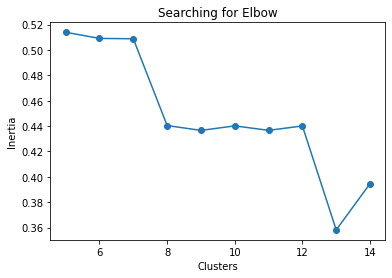

In [8]:
%%time
from sklearn import cluster, metrics

# Initialization, empty list
silhouettes = []

for num_clusters in range(5, 15):
    
    # Creating KMEANS for each number of clusters
    cls = cluster.KMeans(n_clusters=num_clusters)
    
    # Fitting model
    cls.fit(X_stats)
    
    # Silhouette_score for each model
    silh = metrics.silhouette_score(X_stats,cls.labels_)
    
    # Adding score in empty list for each model
    silhouettes.append(silh)
    
    

plt.plot(range(5, 15), silhouettes, marker = 'o')
plt.title('Searching for Elbow')
plt.xlabel('Clusters')
plt.ylabel('Inertia')

Here 13 clusters so 13 groups is too much. We want that each person could compare with a group relatively populated...
So we take 8 clusters

In [9]:
from sklearn import cluster, metrics
from sklearn.decomposition import PCA

cls = cluster.KMeans(n_clusters = 8)

# Creating PCA
pca = PCA(n_components = 2)

# Fit
pca.fit(X_stats)

# We want to see the explained variance of our 2 features
print (pca.explained_variance_ratio_.cumsum())

# Transforming our X in 2 dimensions
X_trans_2= pca.transform(X_stats)

[0.782434   0.99404515]


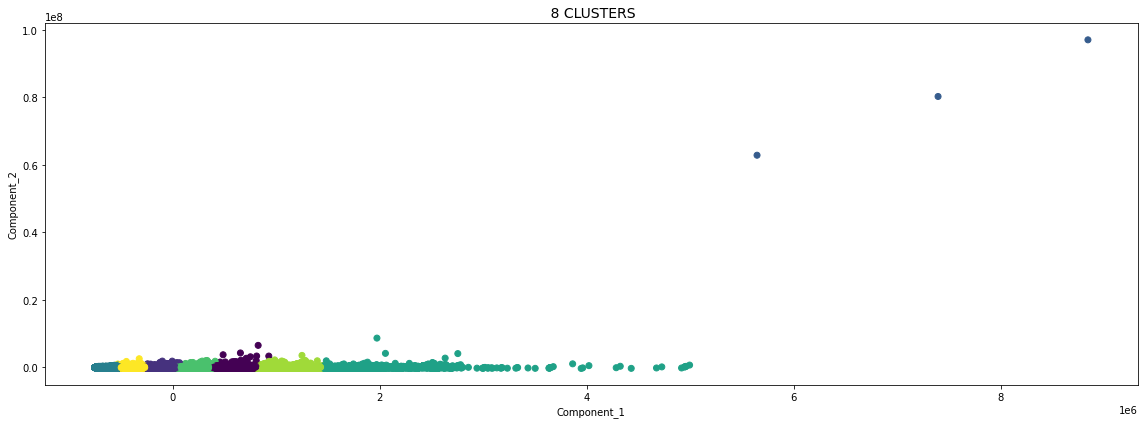

In [10]:
fig = plt.figure(figsize = [16,6])

# 3 clusters
cls = cluster.KMeans(n_clusters = 8)
cls.fit(X_trans_2)

# 
ax = fig.gca()  

# Spatial coordinates of each point in function of our 3 components
x = X_trans_2[:,0]
y = X_trans_2[:,1]


# Plotting scatters distinguishing our 2 clusters
ax.scatter(x, y, label='', marker = 'o',c = cls.labels_)

# Naming axes
ax.set_xlabel('Component_1')
ax.set_ylabel('Component_2')


# Title
plt.title(" 8 CLUSTERS", fontsize = 14)

plt.tight_layout()
plt.show()


In [11]:
X_stats.shape

(295841, 15)

In [12]:
# fitting with our data
km = cluster.KMeans(n_clusters = 8).fit(X_stats)

In [13]:
km

KMeans()

In [14]:
import pickle

In [15]:
# Keeping clustering
pickle.dump (km, open ('clustering_8', 'wb'))

In [16]:
# Labels
km.labels_

array([5, 6, 7, ..., 1, 3, 3])

In [17]:
#check
km.labels_.shape

(295841,)

### Building stats tables

In this part we want that consumers could compare with other people... So once their informations given, they could have stats of the group they bring to.
But they don't want normalized datas, so we make some changes on X

In [18]:
def encode(x):
    '''This function encodes AGE'''
    
    
    if x == 0:
        return 22.5
    elif x == 1:
        return 27.5
    elif x == 2:
        return 32.5
    elif x == 3:
        return 37.5
    elif x == 4:
        return 42.5
    elif x == 5:
        return 47.5
    elif x == 6:
        return 52.5
    elif x == 7:
        return 57.5
    elif x == 8:
        return 62.5
    else:
        return 67.5
    
    
# Apply    
X_stats['AGE'] = X_stats['AGE'].apply(encode)





'''X.loc[X['AGE'] == '0', 'AGE'] = 22.5
X.loc[X['AGE'] == '1', 'AGE'] = 27.5
X.loc[X['AGE'] == '2', 'AGE'] = 32.5
X.loc[X['AGE'] == '3', 'AGE'] = 37.5
X.loc[X['AGE'] == '4', 'AGE'] = 42.5
X.loc[X['AGE'] == '5', 'AGE'] = 47.5
X.loc[X['AGE'] == '6', 'AGE'] = 52.5
X.loc[X['AGE'] == '7', 'AGE'] = 57.5
X.loc[X['AGE'] == '8', 'AGE'] = 62.5
X.loc[X['AGE'] == '9', 'AGE'] = 67.5'''

<ipython-input-18-0a8c9aec26fa>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_stats['AGE'] = X_stats['AGE'].apply(encode)


"X.loc[X['AGE'] == '0', 'AGE'] = 22.5\nX.loc[X['AGE'] == '1', 'AGE'] = 27.5\nX.loc[X['AGE'] == '2', 'AGE'] = 32.5\nX.loc[X['AGE'] == '3', 'AGE'] = 37.5\nX.loc[X['AGE'] == '4', 'AGE'] = 42.5\nX.loc[X['AGE'] == '5', 'AGE'] = 47.5\nX.loc[X['AGE'] == '6', 'AGE'] = 52.5\nX.loc[X['AGE'] == '7', 'AGE'] = 57.5\nX.loc[X['AGE'] == '8', 'AGE'] = 62.5\nX.loc[X['AGE'] == '9', 'AGE'] = 67.5"

In [19]:
X_stats.head(7)

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT
0,67500.0,135000.0,6750.0,135000.0,225,4260.0,2531,2,0,0,0,0.555912,0.729567,67.5,2.000000
1,99000.0,490495.5,27517.5,454500.0,1588,4970.0,477,2,0,0,0,0.354225,0.621226,67.5,4.954500
2,171000.0,1560726.0,41301.0,1395000.0,3130,1213.0,619,2,0,0,0,0.724000,0.492060,67.5,9.127053
3,360000.0,1530000.0,42075.0,1530000.0,449,4597.0,2379,3,0,1,1,0.714279,0.540654,67.5,4.250000
4,112500.0,652500.0,21177.0,652500.0,679,4427.0,738,2,0,0,0,0.651862,0.363945,67.5,5.800000
5,67500.0,80865.0,5881.5,67500.0,2717,311.0,3227,2,0,0,0,0.715042,0.176653,67.5,1.198000
6,225000.0,918468.0,28966.5,697500.0,3028,643.0,4911,2,0,0,0,0.566907,0.770087,67.5,4.082080


In [20]:
# Adding membership group on your DataFrame

MEMBERSHIP = km.labels_
X_stats['MEMBERSHIP'] = MEMBERSHIP
X_stats.head()

<ipython-input-20-1ede32760485>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_stats['MEMBERSHIP'] = MEMBERSHIP


,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,MEMBERSHIP
0,67500.0,135000.0,6750.0,135000.0,225,4260.0,2531,2,0,0,0,0.555912,0.729567,67.5,2.000000,5
1,99000.0,490495.5,27517.5,454500.0,1588,4970.0,477,2,0,0,0,0.354225,0.621226,67.5,4.954500,6
2,171000.0,1560726.0,41301.0,1395000.0,3130,1213.0,619,2,0,0,0,0.724000,0.492060,67.5,9.127053,7
3,360000.0,1530000.0,42075.0,1530000.0,449,4597.0,2379,3,0,1,1,0.714279,0.540654,67.5,4.250000,7
4,112500.0,652500.0,21177.0,652500.0,679,4427.0,738,2,0,0,0,0.651862,0.363945,67.5,5.800000,3


In [21]:
X_stats.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,MEMBERSHIP
0,67500.0,135000.0,6750.0,135000.0,225,4260.0,2531,2,0,0,0,0.555912,0.729567,67.5,2.000000,5
1,99000.0,490495.5,27517.5,454500.0,1588,4970.0,477,2,0,0,0,0.354225,0.621226,67.5,4.954500,6
2,171000.0,1560726.0,41301.0,1395000.0,3130,1213.0,619,2,0,0,0,0.724000,0.492060,67.5,9.127053,7
3,360000.0,1530000.0,42075.0,1530000.0,449,4597.0,2379,3,0,1,1,0.714279,0.540654,67.5,4.250000,7
4,112500.0,652500.0,21177.0,652500.0,679,4427.0,738,2,0,0,0,0.651862,0.363945,67.5,5.800000,3


In [22]:
stat = X_stats.describe()

In [23]:
X0 = X_stats[X_stats['MEMBERSHIP']== 0]

In [24]:
X0.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,MEMBERSHIP
11,202500.0,1132573.5,37561.5,927000.0,1652,2299.0,2299,2,0,0,0,0.233767,0.542445,67.5,5.592956,0
35,180000.0,1080000.0,44118.0,1080000.0,1324,4557.0,586,1,0,0,0,0.026541,0.434733,67.5,6.000000,0
38,180000.0,1256400.0,40657.5,900000.0,579,6105.0,1,1,0,0,0,0.647348,0.562060,67.5,6.980000,0
39,180000.0,1035000.0,43983.0,1035000.0,4856,6836.0,3084,2,0,0,0,0.517270,0.429424,67.5,5.750000,0
60,243000.0,900000.0,32017.5,900000.0,6737,3390.0,4788,1,0,1,1,0.700274,0.071055,67.5,3.703704,0


In [25]:
# Dimensions
X0.shape

(32083, 16)

In [26]:
X0.drop(['MEMBERSHIP'], axis =1, inplace= True)

C:\Users\VOLANTE\anaconda3\envs\OC\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [27]:
# Stat0
stat0 = X0.describe()
stat0

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT
count,3.208300e+04,3.208300e+04,32083.000000,3.208300e+04,32083.000000,32083.000000,32083.000000,32083.000000,32083.000000,32083.000000,32083.000000,32083.000000,32083.000000,32083.0,32083.000000
mean,2.114573e+05,1.010004e+06,38494.432944,8.959869e+05,2488.518156,4557.803332,2871.209987,1.949631,0.054047,0.210236,0.165508,0.517033,0.483941,67.5,5.813951
std,1.261251e+05,9.424483e+04,10687.693138,6.084675e+04,2252.643091,3141.758205,1456.120742,0.494298,0.226115,0.407482,0.371644,0.181111,0.188264,0.0,2.584973
min,2.700000e+04,6.750000e+05,21960.000000,6.750000e+05,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000016,0.000527,67.5,0.117160
25%,1.350000e+05,9.045000e+05,31180.500000,9.000000e+05,919.500000,1905.114022,1644.000000,2.000000,0.000000,0.000000,0.000000,0.403993,0.343595,67.5,4.000000
50%,1.800000e+05,1.007359e+06,35797.500000,9.000000e+05,1832.000000,4163.223840,3008.000000,2.000000,0.000000,0.000000,0.000000,0.559903,0.497469,67.5,5.391000
75%,2.475000e+05,1.078200e+06,44514.000000,9.045000e+05,3295.000000,6719.529469,4150.000000,2.000000,0.000000,0.000000,0.000000,0.657598,0.633032,67.5,7.072032
max,6.750000e+06,1.256400e+06,108396.000000,1.350000e+06,16495.000000,21865.000000,6214.000000,3.000000,1.000000,1.000000,1.000000,0.855000,0.885488,67.5,33.333333


In [28]:
stat0.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat0.csv')

In [29]:
#########################################################################################################################

In [30]:
X1 = X_stats[X_stats['MEMBERSHIP']== 1]

In [31]:
# Dimensions
X1.shape

(71605, 16)

In [32]:
X1.drop(['MEMBERSHIP'], axis =1, inplace= True)

C:\Users\VOLANTE\anaconda3\envs\OC\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [33]:
# Stat1
stat1 = X1.describe()
stat1

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT
count,7.160500e+04,71605.000000,71605.000000,71605.000000,71605.000000,71605.000000,71605.000000,71605.000000,71605.000000,71605.000000,71605.000000,71605.000000,71605.000000,71605.0,71605.000000
mean,1.480702e+05,295329.044990,18632.273355,259869.860687,2096.497591,4436.611326,2758.042665,2.026283,0.065205,0.225292,0.162098,0.465847,0.449670,67.5,2.368146
std,6.990137e+04,51010.300098,5655.613827,42942.148112,2079.530824,2994.769769,1397.525153,0.440634,0.246889,0.417777,0.368543,0.192034,0.198890,0.0,1.086131
min,2.700000e+04,135000.000000,5935.500000,112500.000000,5.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000006,0.000527,67.5,0.066667
25%,1.080000e+05,254700.000000,13963.500000,225000.000000,746.000000,1992.000000,1603.000000,2.000000,0.000000,0.000000,0.000000,0.320806,0.292545,67.5,1.617143
50%,1.350000e+05,284400.000000,17556.036567,247500.000000,1445.000000,4089.912390,2786.000000,2.000000,0.000000,0.000000,0.000000,0.499898,0.450747,67.5,2.182857
75%,1.800000e+05,332284.500000,22149.000000,281831.601222,2702.000000,6389.939237,4016.000000,2.000000,0.000000,0.000000,0.000000,0.623317,0.610991,67.5,2.896960
max,2.700000e+06,453816.000000,47367.000000,540000.000000,17912.000000,22701.000000,6259.000000,3.000000,1.000000,1.000000,1.000000,0.855000,0.887664,67.5,12.903226


In [34]:
stat1.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat1.csv')

In [35]:
###############################################################################################################################

In [36]:
X2 = X_stats[X_stats['MEMBERSHIP']== 2]

In [37]:
X2

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT,MEMBERSHIP
236287,8.081506e+07,668587.292360,36082.410770,594543.371426,961,4638.558981,2532,2,0,0,0,0.284696,0.212107,67.5,0.152987,2
268022,6.331203e+07,558451.320732,27161.511307,473337.882597,834,6134.070580,3014,1,0,0,0,0.405040,0.213245,67.5,0.166123,2
291279,9.766484e+07,619810.186696,30037.840043,530159.308858,1029,6009.482834,4033,1,0,0,0,0.222083,0.212645,67.5,0.052514,2


In [38]:
# Dimensions
X2.shape

(3, 16)

In [39]:
X2.drop(['MEMBERSHIP'], axis =1, inplace= True)

C:\Users\VOLANTE\anaconda3\envs\OC\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [40]:
# Stat2
stat2 = X2.describe()
stat2

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT
count,3.000000e+00,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,3.0,3.0,3.000000,3.000000,3.0,3.000000
mean,8.059731e+07,615616.266596,31093.920707,532680.187627,941.333333,5594.037465,3193.000000,1.333333,0.0,0.0,0.0,0.303940,0.212665,67.5,0.123875
std,1.717744e+07,55187.632546,4553.250662,60642.054326,98.976428,829.810145,766.342613,0.577350,0.0,0.0,0.0,0.092984,0.000569,0.0,0.062148
min,6.331203e+07,558451.320732,27161.511307,473337.882597,834.000000,4638.558981,2532.000000,1.000000,0.0,0.0,0.0,0.222083,0.212107,67.5,0.052514
25%,7.206355e+07,589130.753714,28599.675675,501748.595727,897.500000,5324.020907,2773.000000,1.000000,0.0,0.0,0.0,0.253390,0.212376,67.5,0.102751
50%,8.081506e+07,619810.186696,30037.840043,530159.308858,961.000000,6009.482834,3014.000000,1.000000,0.0,0.0,0.0,0.284696,0.212645,67.5,0.152987
75%,8.923995e+07,644198.739528,33060.125407,562351.340142,995.000000,6071.776707,3523.500000,1.500000,0.0,0.0,0.0,0.344868,0.212945,67.5,0.159555
max,9.766484e+07,668587.292360,36082.410770,594543.371426,1029.000000,6134.070580,4033.000000,2.000000,0.0,0.0,0.0,0.405040,0.213245,67.5,0.166123


In [41]:
stat2.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat2.csv')

In [42]:
###############################################################################################################################

In [43]:
X3 = X_stats[X_stats['MEMBERSHIP']== 3]

In [44]:
# Dimensions
X3.shape

(49346, 16)

In [45]:
X3.drop(['MEMBERSHIP'], axis =1, inplace= True)

C:\Users\VOLANTE\anaconda3\envs\OC\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [46]:
# Stat3
stat3 = X3.describe()
stat3

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT
count,4.934600e+04,49346.000000,49346.000000,4.934600e+04,49346.000000,49346.000000,49346.000000,49346.000000,49346.000000,49346.000000,49346.000000,49346.000000,49346.000000,49346.0,49346.000000
mean,1.877454e+05,758489.008232,33292.395947,6.716050e+05,2445.590038,4647.307682,2853.262473,1.974527,0.054817,0.210331,0.163681,0.503241,0.474254,67.5,4.878506
std,9.307146e+04,77713.959384,10450.556041,4.680198e+04,2260.312204,3138.723822,1439.413063,0.477076,0.227625,0.407548,0.369990,0.183260,0.190802,0.0,2.225353
min,2.700000e+04,382500.000000,16024.500000,4.905000e+05,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000019,0.000527,67.5,0.300000
25%,1.350000e+05,677617.124186,26123.569669,6.750000e+05,877.000000,1995.000000,1660.000000,2.000000,0.000000,0.000000,0.000000,0.380877,0.329655,67.5,3.333333
50%,1.710000e+05,755190.000000,31243.500000,6.750000e+05,1777.000000,4305.000000,2971.000000,2.000000,0.000000,0.000000,0.000000,0.544437,0.483680,67.5,4.462550
75%,2.250000e+05,808650.000000,37522.677377,6.795000e+05,3243.750000,6879.507178,4129.750000,2.000000,0.000000,0.000000,0.000000,0.647561,0.626304,67.5,6.000000
max,2.250000e+06,969952.616140,89536.500000,1.012500e+06,16767.000000,20136.000000,6551.000000,3.000000,1.000000,1.000000,1.000000,0.855000,0.885488,67.5,25.671429


In [47]:
stat3.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat3.csv')

In [48]:
###############################################################################################################################

In [49]:
X4 = X_stats[X_stats['MEMBERSHIP']== 4]

In [50]:
# Dimensions
X4.shape

(6177, 16)

In [51]:
X4.drop(['MEMBERSHIP'], axis =1, inplace= True)

C:\Users\VOLANTE\anaconda3\envs\OC\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [52]:
# Stat4
stat4 = X4.describe()
stat4

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT
count,6.177000e+03,6.177000e+03,6177.000000,6.177000e+03,6177.000000,6177.000000,6177.000000,6177.000000,6177.000000,6177.000000,6177.000000,6177.000000,6177.000000,6177.0,6177.000000
mean,3.051306e+05,1.901889e+06,59385.729218,1.772396e+06,2758.733204,4455.498751,3000.986887,1.788409,0.055367,0.194269,0.159948,0.586912,0.516212,67.5,7.488895
std,2.118208e+05,2.771362e+05,17511.967423,2.485943e+05,2472.709733,3183.215664,1483.622850,0.560817,0.228713,0.395669,0.366588,0.155026,0.183998,0.0,2.961681
min,5.400000e+04,1.431531e+06,39816.000000,1.350000e+06,20.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.004792,0.000527,67.5,0.159059
25%,2.025000e+05,1.755000e+06,48586.500000,1.575000e+06,989.000000,1705.000000,1777.000000,1.000000,0.000000,0.000000,0.000000,0.512568,0.379100,67.5,5.338325
50%,2.700000e+05,1.800000e+06,55926.000000,1.800000e+06,2068.000000,4000.523564,3186.000000,2.000000,0.000000,0.000000,0.000000,0.628358,0.538863,67.5,7.067083
75%,3.600000e+05,2.013840e+06,65358.000000,1.800000e+06,3730.000000,6664.000000,4297.000000,2.000000,0.000000,0.000000,0.000000,0.701085,0.665037,67.5,9.317778
max,9.000000e+06,4.050000e+06,258025.500000,4.050000e+06,16632.000000,16970.000000,6207.000000,3.000000,1.000000,1.000000,1.000000,0.818404,0.882530,67.5,31.938667


In [53]:
stat4.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat4.csv')

In [54]:
###########################################################################################################################

In [55]:
X5 = X_stats[X_stats['MEMBERSHIP']== 5]

In [56]:
# Dimensions
X5.shape

(36087, 16)

In [57]:
X5.drop(['MEMBERSHIP'], axis =1, inplace= True)

C:\Users\VOLANTE\anaconda3\envs\OC\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [58]:
# Stat5
stat5 = X5.describe()
stat5

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT
count,36087.000000,36087.000000,36087.000000,36087.000000,36087.000000,36087.000000,36087.000000,36087.000000,36087.000000,36087.000000,36087.000000,36087.000000,36087.000000,36087.0,36087.000000
mean,126566.767000,157038.125617,11060.203575,142680.584001,1997.925680,4457.136137,2683.101643,2.062765,0.075706,0.241527,0.168593,0.459090,0.461508,67.5,1.454542
std,56590.922647,43811.747083,3876.983989,41013.368406,2013.822597,2987.549076,1430.973294,0.409079,0.264531,0.428015,0.374397,0.189879,0.197982,0.0,0.722879
min,26550.000000,45000.000000,1980.000000,40500.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000001,0.000527,67.5,0.116379
25%,90000.000000,134775.000000,9000.000000,112500.000000,713.000000,2006.873656,1450.000000,2.000000,0.000000,0.000000,0.000000,0.318117,0.306202,67.5,0.940888
50%,112500.000000,167895.000000,10125.000000,144000.000000,1358.000000,4108.000000,2698.000000,2.000000,0.000000,0.000000,0.000000,0.490338,0.465069,67.5,1.333333
75%,157500.000000,180000.000000,13351.343465,180000.000000,2564.000000,6427.696042,3993.000000,2.000000,0.000000,0.000000,0.000000,0.614040,0.622598,67.5,1.811200
max,810000.000000,315000.000000,26757.000000,270000.000000,17139.000000,19488.000000,6226.000000,3.000000,1.000000,1.000000,1.000000,0.855000,0.882530,67.5,8.848000


In [59]:
stat5.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat5.csv')

In [60]:
#########################################################################################################################

In [61]:
X6 = X_stats[X_stats['MEMBERSHIP']== 6]

In [62]:
# Dimensions
X6.shape

(77090, 16)

In [63]:
X6.drop(['MEMBERSHIP'], axis =1, inplace= True)

C:\Users\VOLANTE\anaconda3\envs\OC\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [64]:
# Stat6
stat6 = X6.describe()
stat6

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT
count,7.709000e+04,77090.000000,77090.000000,77090.000000,77090.000000,77090.000000,77090.00000,77090.000000,77090.000000,77090.000000,77090.000000,77090.000000,77090.000000,77090.0,77090.000000
mean,1.736071e+05,518450.756318,27759.154429,452303.356809,2142.109405,4377.909778,2795.71506,1.990479,0.061175,0.222195,0.159191,0.472514,0.439575,67.5,3.565859
std,8.372604e+04,65369.636907,7992.694809,45577.640196,2059.460181,3033.753404,1401.20659,0.461225,0.239653,0.415724,0.365856,0.191229,0.194242,0.0,1.602751
min,2.700000e+04,135000.000000,6750.000000,135000.000000,4.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000013,0.000527,67.5,0.188889
25%,1.164201e+05,452385.000000,22018.500000,450000.000000,786.000000,1814.692973,1646.00000,2.000000,0.000000,0.000000,0.000000,0.332495,0.288130,67.5,2.467748
50%,1.575000e+05,521280.000000,26533.414349,450000.000000,1504.000000,4026.042324,2845.00000,2.000000,0.000000,0.000000,0.000000,0.508579,0.438281,67.5,3.292457
75%,2.025000e+05,557770.500000,31261.500000,463500.000000,2776.000000,6385.000000,4045.00000,2.000000,0.000000,0.000000,0.000000,0.628301,0.593718,67.5,4.347826
max,2.025000e+06,697866.210731,72306.000000,900000.000000,16429.000000,22442.000000,7197.00000,3.000000,1.000000,1.000000,1.000000,0.855000,0.893976,67.5,20.541143


In [65]:
stat6.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat6.csv')

In [66]:
###############################################################################################################################

In [67]:
X7 = X_stats[X_stats['MEMBERSHIP']== 7]

In [68]:
# Dimensions
X7.shape

(23450, 16)

In [69]:
X7.drop(['MEMBERSHIP'], axis =1, inplace= True)

C:\Users\VOLANTE\anaconda3\envs\OC\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [70]:
# Stat7
stat7 = X7.describe()
stat7

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,AGE,CREDIT_INCOME_PERCENT
count,2.345000e+04,2.345000e+04,23450.000000,2.345000e+04,23450.000000,23450.000000,23450.000000,23450.000000,23450.000000,23450.000000,23450.000000,23450.000000,23450.000000,23450.0,23450.000000
mean,2.310253e+05,1.312882e+06,44163.674505,1.204937e+06,2738.416972,4723.377413,2923.563156,1.918891,0.053561,0.204435,0.166994,0.545713,0.511705,67.5,6.864174
std,1.294732e+05,1.373426e+05,11174.239973,1.126254e+05,2410.747647,3207.807296,1459.617649,0.511196,0.225154,0.403297,0.372978,0.173962,0.182615,0.0,2.899321
min,4.050000e+04,8.550000e+05,28552.500000,9.000000e+05,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000123,0.000527,67.5,0.309400
25%,1.575000e+05,1.223010e+06,37669.500000,1.125000e+06,1011.000000,2020.404619,1749.250000,2.000000,0.000000,0.000000,0.000000,0.448363,0.382502,67.5,4.887048
50%,2.025000e+05,1.288350e+06,41562.000000,1.129500e+06,2063.000000,4363.000000,3068.000000,2.000000,0.000000,0.000000,0.000000,0.591815,0.528093,67.5,6.387854
75%,2.700000e+05,1.357133e+06,48501.000000,1.350000e+06,3704.000000,7028.000000,4210.000000,2.000000,0.000000,0.000000,0.000000,0.678009,0.657784,67.5,8.400000
max,3.825000e+06,1.724220e+06,146250.000000,1.554010e+06,16424.000000,22928.000000,6166.000000,3.000000,1.000000,1.000000,1.000000,0.855000,0.882530,67.5,32.222222


In [71]:
stat7.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/stat7.csv')

In [72]:
stat.to_csv('C:/Users/VOLANTE/anaconda3/envs/OC/P7/global_stats.csv')

In [73]:
############################################################################################################################